# Logistic Regression

## From Regression to Classification

In the previous chapter we discussed linear regression and its application. It is a very valuable tool because

* it is easy to fit
* has simple interpretation and 
* tests of statistical significance can be performed without difficulty.

But it has its drawbacks too. For example: it makes quite strong assumptions about the functional form of $f(X)$ and the error terms. Another disadvantage is that linear regression is not suited for classification problems where we deal with qualitative responses. 

Below figure, where we regress the probability of default onto credit card balance, visualizes the issue. 

* Linear regression produces negative probabilities for some balances
* Due to the large number of non-defaults, the linear regression's probability of default barely rises above 25%. This begs the question where we should set the threshold to qualify a default case. 

<img src="Graphics/0206_LinRegClassification.png" alt="LinearRegClassification" style="width: 800px;"/>

Logistic regression is able to overcome these obstacles. Rather than modeling the default class $y$ (e.g. 0 for non-default, 1 for default) it models the (conditional) probability that $y$ belongs to a certain category, $\Pr(Y=y|X)$. 

## Logistic Model

In above figure we display our attempt to estimated the probability of default given one feature, i.e. a client's credit card balance. In the same way we could have used a multiple linear regression (with multiple features as input) to estimate the probability. 

$$\begin{equation}
\Pr(Y=y|X) = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p
\end{equation}$$

But as discussed above for the simple case, this too would yield unbounded probabilities with $y > 1$ and $y<0$ for some $X$ (for convenience let us assume that we are using the generic 0/1 coding for the dependent variable). The question thus is: how could we improve on that model such that we have bounded results with probabilities of default? A well known function which satisfies the inequality $0 \leq f(x) \leq 1$ (and is continuous and hence differentiable) is the so called "Sigmoid" or "Logistic" function which is defined as 

$$\begin{equation}
S(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{1 + e^x}
\end{equation}$$

<img src="Graphics/0206_Sigmoid.png" alt="LogisticFunction" style="width: 500px;"/>

Above figure displays the function's shape. Its range is bounded by $[0, 1]$ and its notable "S" shape depends on the input parameter $x$. For logistic regression $x$ takes on the known functional form of a linear regression:

$$\begin{equation}
\Pr(Y=y|X) = \frac{e^{\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p}}{1 + e^{\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p}}
\end{equation}$$

This function is related to the linear model in that by rearranging the equation we arrive at

$$\begin{equation*}
\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p}
\end{equation*}$$

Notice that for ease of use we define $p(X)$ as equivalent of $\Pr(Y=y|X)$. Taking the natural logarithm of above expression yields

$$\begin{equation}
\underbrace{\log\left(\frac{p(X)}{1 - p(X)}\right)}_{\textit{Logit}} = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p,
\end{equation}$$

a function where the output on the left-hand side, the so called **Logit** or **log-odds**, is linear in $X$.

## Estimating the Coefficients

To run a logistic regression we need to estimate the $\beta$ coefficients in the following equation: 

$$\begin{equation}
\Pr(Y=y|X) = \frac{e^{\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p}}{1 + e^{\beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p}}
\end{equation}$$

In the linear regression setting we used a least squares approach. Here, however, we switch to a method called **maximum likelihood**. This approach is used in many areas of statistics/machine learning to fit models and as such often studied in graduate courses. Here we will restrict ourselves to a very superficial discussion of the intuition. For the interested reader, [Elkan (2014)](http://cseweb.ucsd.edu/~elkan/250B/logreg.pdf) provides an excellent, concise introduction, whereas Bishop (2006) has a more advanced and thorough discussion of the topic. 

Back to the intuition: maximum likelihood optimizes the above equation to get estimates of $\beta$ "such that the predicted probability $\hat{p}(x_i)$ of default for each individual [$\ldots$] corresponds as closely as possible to the individual's observed default status. In other words, we try to find $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p$ such that plugging these estimates into the model for $p(X)$ [$\ldots$] yields a number close to one for all individuals who defaulted, and a number close to zero for all individuals who did not." (James et al. (2013, p. 133)). 

The maximum likelihood function that is used to estimate the $\beta$ coefficients in the logistic regression model is derived from the probability distribution of the dependent variable $y$. Since $y$ takes on one of two values (in our example $y \in \{0, 1\}$) and assuming the response values are independent of each other, the probability mass function of $Y$ follows a Bernoulli distribution, $Y \sim Bern(p)$, which is a special case of the Binomial distribution $Bin(n, p)$ with $n=1$. Its probability mass function is 

\begin{equation*}
f(y;p) = p(Y=y) = p^y (1-p)^{1-y} = 
\begin{cases}
p & \text{ if } y=1 \\
(1-p) & \text{ if } y=0 
\end{cases}
\end{equation*}

The joint probability mass function of $Y$ is 

\begin{equation*}
f(y | \beta) = \prod_{i=1}^N p(x_i)^{y_i} \, (1-p(x_i))^{1-y_i}
\end{equation*}

and describes the values of $y$ as a function of known, fixed values for $\beta$, where $\beta$ is related to $y$ through the logistic function. Since we don't know the coefficients $\beta$ but have measured outcomes for $y$ the likelihood function reverses above joint probability mass function such that it expresses the values of $\beta$ in terms of known, fixed values for $y$. This is the likelihood function ([Czepiel (2002)](https://czep.net/stat/mlelr.pdf)).

\begin{equation}
L(\beta | y) = \prod_{i=1}^N p(x_i)^{y_i} \, (1-p(x_i))^{1-y_i}
\end{equation}

The maximum likelihood estimates are now those values for $\beta$ which maximize the likelihood function $L(\beta | y)$. Typically, to find the maximum likelihood estimates we would differentiate the (log-) likelihood with respect to the coefficients, set the derivatives equal to zero, and solve. However, there is no closed-form solution for this and thus numerical methods (such as Newton-Raphson, Newton-conjugent gradient etc.) are required to derive a maxima ([Shalizi (2017)](http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/ADAfaEPoV.pdf)). 

Below clip I found to be an excellent introduction into the details of how the log-likelihood is derived with maximum likelihood.

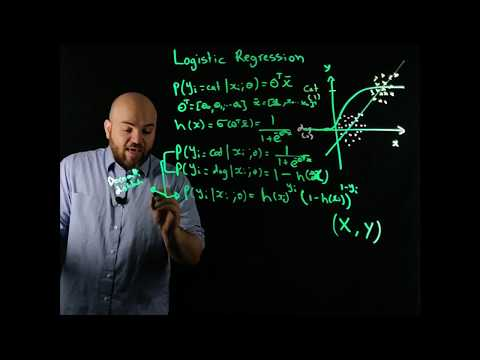

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('TM1lijyQnaI')

Thankfully, statistical packages such as Python's `statsmodels` have the necessary tools and functions integrated into the relevant functions such that we do not need to concern ourselves with the details. 

## Logistic Regression in Python

### Package Selection

To show how logistic regression is run in Python we will again rely on functions from the `statsmodels` package. The Scikit-learn package `sklearn` contains similar functions. However, when it comes to calling results, the `statsmodels` functions for logistic regression follow those for linear regression which we got to know in the previous chapter. Therefore we will work with this package. 

### Data Load

We will use the generic 'Default' data set from James et al. (2013), which we discussed in this chapter's introduction. It is taken from the book's corresponding `R` package and made available in this course's data folder on GitHub. We start our journey as usual with the initial load of the necessary packages and setting a few options.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn-whitegrid')

In [3]:
# Default data set is not available online. Data was extracted from R package "ISLR"
df = pd.read_csv('Data/Default.csv', sep=',')

# Factorize 'No' and 'Yes' in columns 'default' and 'student'
df['defaultFac'] = df.default.factorize()[0]
df['studentFac'] = df.student.factorize()[0]
df.head(5)

,default,student,balance,income,defaultFac,studentFac
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


### Simple Logistic Regression

Similar to linear regression with `statsmodels` there exist different ways to compute a logistic regression. For reference, we will show three approaches here:

1. R-Style: The `statsmodels.formula.api` library has a `glm` function mimicking `R`'s way of running glm regressions
2. Classic GLM: Using the `GLM` function from the `statsmodels.api` library 
3. Logit regression: `statsmodels.api`'s `Logit` function follows the approach we used for OLS case 

You might ask what GLM/glm means. It stands for *Generlized Linear Models* and as such is a generalization of linear regression approaches (linear, logistic, Poisson regression). There are many good resources available on the web for the interested. A good textbook introducing GLM is Alan Agresti's *Foundations of Linear and Generalized Linear Models* (Agresti (2015)).

#### R-Style

* This method allows for a verbose definition of the regression. 
* It follows the pattern `y ~ X1 + X2 + ... + Xn` - in words we regress $y$ on $X_1, X_2, \ldots, X_n$ where $X_i$ is a vector of a particular feature. 
* By default a constant is added to the regression
* `family` is a necessary argument. Remember that above, where we discussed the maximum likelihood approach of estimating the coefficients, we mentioned that the binary response $y$ follows a Bernoulli distribution, which is a special case of a Binomial distribution. Thus we chose `family=sm.families.Binomial()`. 
* The `.fit()` method runs the maximum likelihood estimation of the coefficients. Default method is 'Newton-Raphson' (method=`newton`) and this fits our needs. Nonetheless, others are available. Use the help function `sm.Logit.fit?` to see what options you have (it's the same for all three approaches).

More details can be found [here](http://www.statsmodels.org/dev/example_formulas.html)

In [4]:
# 1. R-Style

# R-Style formula
formula = 'defaultFac ~ balance'

# Regress model
logReg = smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit()
print(logReg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             defaultFac   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Sat, 15 Feb 2020   Deviance:                       1596.5
Time:                        11:55:06   Pearson chi2:                 7.15e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.0

#### Classic GLM

* `endog` = endogenous variable = response = $y$
* `exog` = exogenous variable(s) = features = $X$
* Notice that a constant needs to be added manually with `sm.add_constant(X)`

Function details are described [here](http://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM).

In [16]:
# 2. GLM 

# Regress model
logReg = sm.GLM(endog=df.defaultFac, exog=sm.add_constant(df.balance), 
                family=sm.families.Binomial()).fit()
print(logReg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             defaultFac   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Sat, 15 Feb 2020   Deviance:                       1596.5
Time:                        12:03:05   Pearson chi2:                 7.15e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.0

#### Logit Regression

* `endog` = endogenous variable = response = $y$
* `exog` = exogenous variable(s) = features = $X$
* Notice that a constant needs to be added manually with `sm.add_constant(X)`
* No need to specify `family` (Logit is per default binomial)
 

The full function details are to be found [here](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html)

In [6]:
# 3. Logit 

# Regress model
logReg = sm.Logit(endog=df.defaultFac, exog=sm.add_constant(df.balance)).fit()
print(logReg.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             defaultFac   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                  0.4534
Time:                        11:55:06   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

### Accessing Output

Though the scope of information in the summaries differ slightly between the different approaches the function yield the same results. As in the case of linear regression, the model's output can be accessed through its different methods and attributes. For example the models parameters and p-values are easily accessed as shown below. 

In [7]:
logReg.params

const     -10.651331
balance     0.005499
dtype: float64

In [8]:
logReg.pvalues

const      3.723665e-191
balance    2.010855e-137
dtype: float64

### Hypothesis Testing

The $z$-statistic in above summary and the corresponding p-values play the same role as the $t$-statistic in the linear regression output. For example, the $z$-statistic associated with $\hat{\beta}_1$ is equal to $\hat{\beta}_1 / SE(\hat{\beta}_1)$. You can check this by running `logReg.params[1] / logReg.bse[1]`. A large (absolute) $z$-value, and correspondingly a small p-value, provides evidence against the null hypothesis $H_0 : \beta_1 = 0$. Notice that this null hypothesis implies that $p(X) = \dfrac{e^{\beta_0}}{(1 + e^{\beta_0})}$. 

The main purpose of the intercept is to adjust the average fitted probabilities to the proportion of ones in the data. Beyond that it is not of interest.

If we are interested in the coefficient's 99% CI (instead of 95% like in the summary) we can use the same code as in the linear regression case.

In [9]:
logReg.conf_int(alpha=0.01)

,0,1
const,-11.581640,-9.721022
balance,0.004931,0.006067


### Making Predictions

If we wish to make predictions of the default probability we can use the `.predict()` method. Given we leave the brackets empty, this method will calculate $p(X)$ on the basis of the previously used feature training sample. If we wish to get the probability of default for a balance of, let us say, USD 2'000 we can run the following line of code:

In [10]:
# X must include 1 in first column for intercept
logReg.predict([1, 2000])

array([0.58576937])

The vector $[1, 2000]$ in the above `.predict()` function corresponds to a row vector containing the $x$-values for which we wish to predict the probability of default. If we had $p$ features, this vector would obviously have lenght $p+1$ ($p$ features + 1 for intercept).

For future reference, below code generates a confusion matrix. We will discuss confusion matrices in more detail in the chapter on $k$-Nearest Neighbor. The `threshold` parameter defines above what probability a new observation is labeled/predicted as 1 (default); if no value is given, the function reverts to its default settings which is `threshold=0.5`. 

In [11]:
# Confusion Matrix for LogRegression
logReg.pred_table(threshold=0.5)

array([[9625.,   42.],
       [ 233.,  100.]])

### Plotting

Above we regressed default on balance. Thus this can still be displayed in a 2d-figure. In order to do so we need to sort the data first. Once this is done, plotting follows the usual routine.

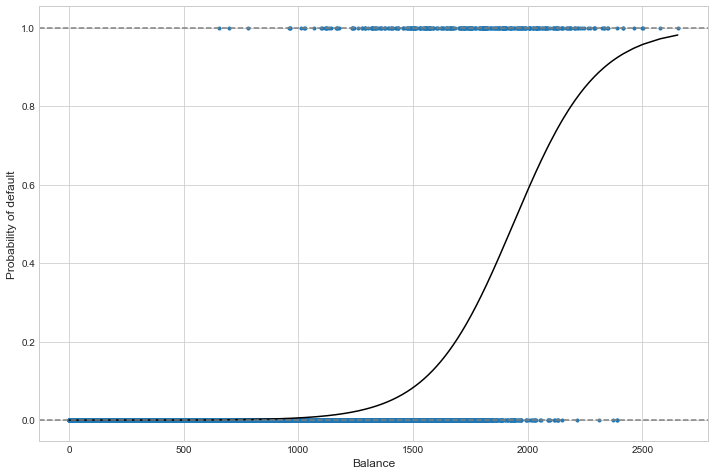

In [12]:
# Create sorted resutls-df
res = pd.DataFrame()
res['balance'] = df.balance
res['prob'] = logReg.predict()
res = res.sort_values('balance')

# Plot scatter & logReg
plt.figure(figsize=(12, 8))
plt.scatter(df.balance, df.defaultFac, marker='.')
plt.plot(res.balance, res.prob, c='k')
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.axhline(y=1, color='gray', linestyle='dashed')
plt.ylabel('Probability of default', fontsize=12)
plt.xlabel('Balance', fontsize=12);

Here is an alternative way of plotting it. Notice that for the logistic function I do not use the data I trained it with but 'any possible' outcome. 

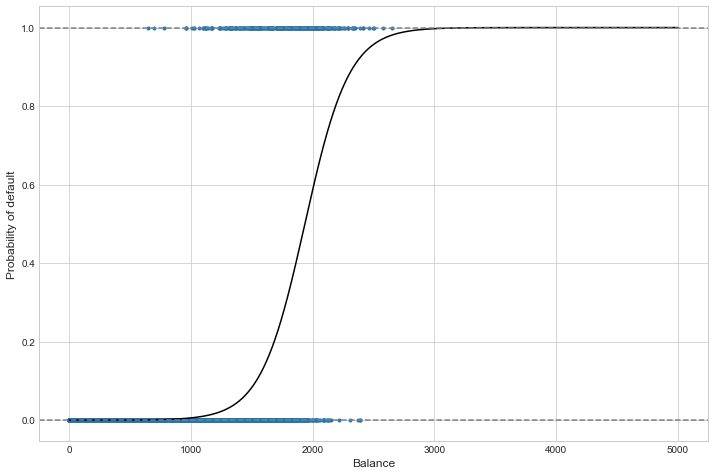

In [33]:
# Create sorted resutls-df
res = pd.DataFrame()
res['balance'] = np.linspace(start=0, stop=5000, num=10000)
res['prob'] = logReg.predict(sm.add_constant(res['balance']))

# Plot scatter & logReg
plt.figure(figsize=(12, 8))
plt.scatter(df.balance, df.defaultFac, marker='.')
plt.plot(res.balance, res.prob, c='k')
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.axhline(y=1, color='gray', linestyle='dashed')
plt.ylabel('Probability of default', fontsize=12)
plt.xlabel('Balance', fontsize=12);

### Multiple Logistic Regression

Regressing 'default' on multiple features follows the same procedure as for simple logistic regression. As a case of use we regress 'default' on 'balance', a credit card holder's 'income' and the dummy variable 'studentFac' (1 if applicant is a student, 0 otherwise). 

In [13]:
# Assign features to matrix X and response to y
X = sm.add_constant(df[['balance', 'income', 'studentFac']])
X.income = X.income / 1000  # Income in 1'000 dollars
y = df.defaultFac

# Run Logistic Regression
logReg = sm.Logit(endog=y, exog=X).fit()
print(logReg.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income         0.0030      0.008      0.370      0.712      -0.013       0.019
studentFac    -0.6468      0.236     -2.738      0.006      -1.110      -0.184


The p-value for `income` is surprisingly large, indicatign that there is no clear evidence of a real association between the probability of default and income. In a case study this certainly would need to be further examined. 

### Multiple Logistic Regression with Scikit-learn

For reference we show below how logistic regression is run with Scikit-learn. Unfortunately, there is no summary output available in Scikit-learn like there is within the Statsmodels package. The main reason is that sklearn is not used for statistical inference but for predictive modelling/ML and the evaluation criteria are based on performance on previously unseen data. 

Notice that in order to have similar coefficients/results, the hyperparameter `C` has to be set to `C=1e9`. This parameter is a regularization parameter that refers to the L1/L2 penalty scheme implemented. For details refer to Scikit-learn's [user guide](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [this discussion on Stackoverflow](https://stackoverflow.com/questions/43431236/how-to-perform-an-unregularized-logistic-regression-using-scikit-learn) or chapter 6.2 in James et al. (2013).

In [14]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(C=1e9, fit_intercept=False).fit(X, y)

In [15]:
logReg.coef_

array([[-1.08690136e+01,  5.73652683e-03,  3.03186192e-03,
        -6.46798865e-01]])

### Decision Boundary

We've seen above how one can plot a logistic regression in the simple case with just one feature. If you regress a response on two features, it is still possible to create very meaningful plots. A good example is [this answer on stackoverflow](https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression) where the decision boundary is drawn and the color scheme follows the probability of the response. 

## Closing Comments
In closing this chapter it should be mentioned that the preceding code sections are by no means a thorough analysis but a superficial digging into the topics. Yet the tools and measures necessary to understand the output are yet to be introduced. For this we refer to the chapter on linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA) (and subsequent chapters) where many tools are introduced that are of significant help in analyzing an algorithm's output.

# Further Ressources


In writing this notebook, many ressources were consulted. For internet ressources links are provided within the textflow above. Beyond these links, the following ressources were consulted and are recommended as further reading on the discussed topics:

* Agresti, Alan, 2015, *Foundations of Linear and Generalized Linear Models* (John Wiley & Sons, Hoboken, NJ).
* Bishop, Christopher M., 2006, *Pattern Recognition and Machine Learning* (Springer, New York, NY).
* Czepiel, Scott A., 2002, Maximum Likelihood Estimation of Logistic Regression Models: Theory and Implementation from website, https://czep.net/stat/mlelr.pdf, 08/24/17.
* Elkan, Charles, 2014, Maximum Likelihood, Logistic Regression, and Stochastic Gradient Training from website, http://cseweb.ucsd.edu/~elkan/250B/logreg.pdf, 08/24/17.
* James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani, 2013, *An Introduction to Statistical Learning: With Applications in R* (Springer Science & Business Media, New York, NY).
* Shalizi, Cosma Rohilla, 2017, Advanced Data Analysis from an Elementary Point of View from website, http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/ADAfaEPoV.pdf, 08/24/17.
